# Groceries : Cohort Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import datetime as dt

In [2]:
filePath = 'Groceries_dataset.csv'

In [3]:
df = pd.read_csv(filePath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
# Item Description

df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

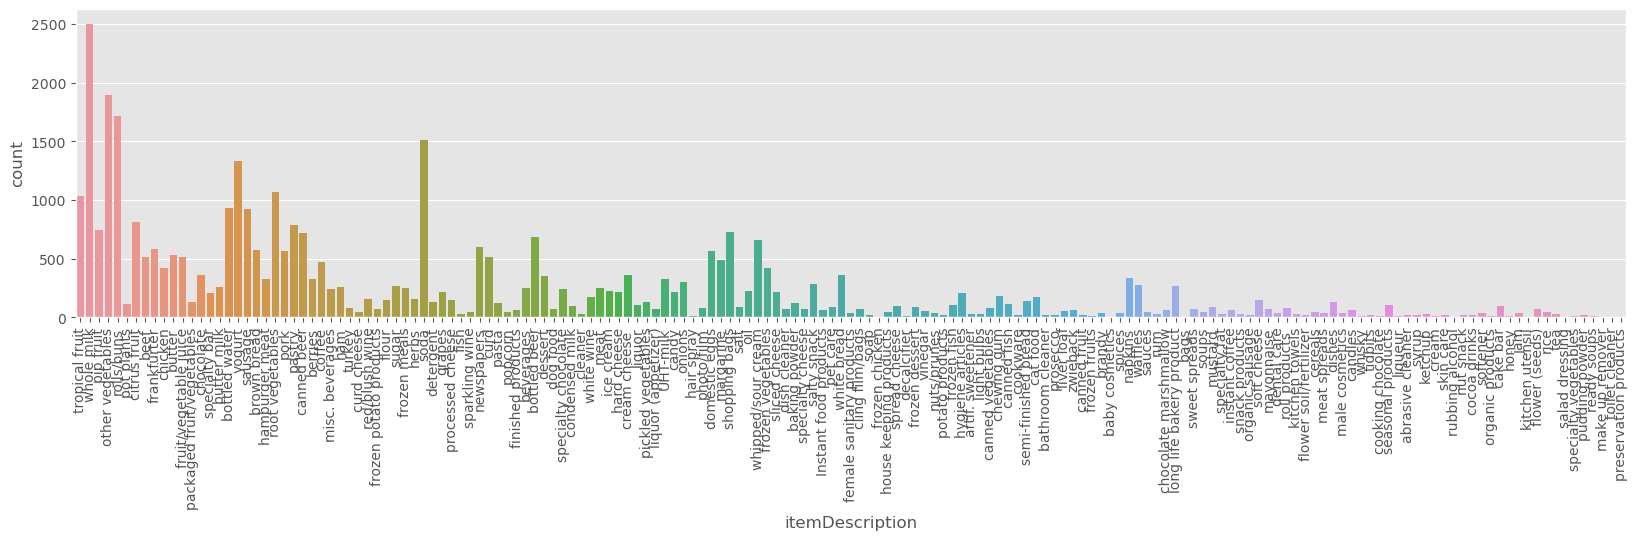

In [5]:
plt.figure(figsize =(20,4))
sns.countplot(data=df,x=df.itemDescription)
plt.xticks(rotation=90)
plt.show()

In [6]:
from wordcloud import WordCloud

In [7]:
all_descriptions =' '.join(df['itemDescription'])
new_str =''
for item in list(set((all_descriptions).split(' '))):
    new_str += f'{item} '
    
new_str

' fruit candy light hamburger milk zwieback pork grapes (seeds) citrus dessert bakery other house vegetables margarine spray rolls/buns yogurt dental film/bags pudding salt dressing potato products brandy up jam soda marshmallow fat sanitary seasonal tea wine keeping cleaner dog cocoa softener beer roll cereals herbs chewing misc. pickled tropical male nut cake sweet syrup mayonnaise cosmetics nuts/prunes sparkling oil berries instant packaged meat care red/blush skin sauces flour loaf soil/fertilizer fruit/vegetables fish whisky ham sweetener preservation beef rice toilet semi-finished bar rubbing curd Instant gum hard plants alcohol water chocolate decalcifier soap detergent brown newspapers prosecco organic finished cooking mustard turkey pasta beverages abrasive salty meals condensed chicken dishes remover female eggs root sugar flower shopping butter coffee bags utensil cat food bathroom pip specialty make spices long processed articles salad juice liqueur bottled towels liver ice

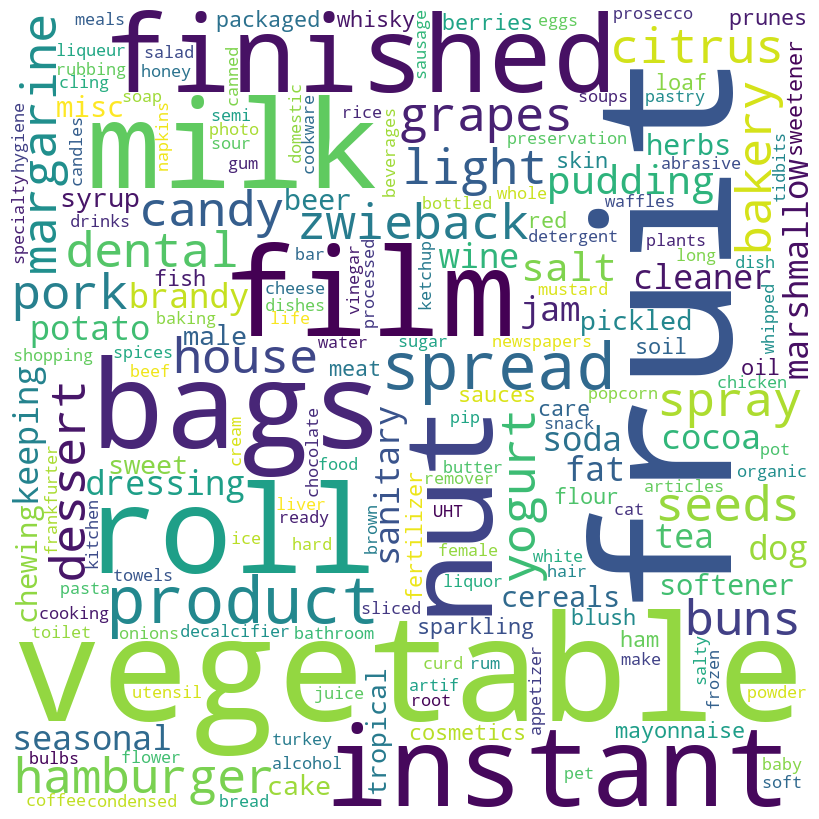

In [8]:
wc = WordCloud(width=800, height=800, background_color='white').generate(new_str)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [9]:
def getCategory(item):
    # if any(i in item for i in ['milk','butter']):
    #     return 'Milk Product'
    if any(i in item for i in ['fruit','berries']):
        return 'Fruits'
    elif any(i in item for i in ['juice']):
        return 'Juices'
    elif any(i in item for i in ['frozen']):
        return 'Frozen Foods'
    elif any(i in item for i in ['meat','ham','sausage','frankfurter','chicken','pork','turkey','fish','liver']):
        return 'Meat Products'
    elif any(i in item for i in ['coffee','wine','water','beverages','bottled','prosecco','whisky','tea','rum','liqueur','brandy','drink','syrup','liquor']):
        return 'Drinks'
    elif any(i in item for i in ['cheese','yogurt','milk','butter','eggs']):
        return 'Dairy Product'
    elif any(i in item for i in ['candy','cream','waffles','appetizer','cake','pastry','chocolate','snack','dessert']):
        return 'Snack'
    elif any(i in item for i in ['vegetables','potato','buns']):
        return 'Veggies'
    elif any(i in item for i in ['vinegar','sugar','onions','sauce','sweetener','spices','ketchup','salt','sweet spreads']):
        return 'Seasoning'
    elif any(i in item for i in ['zwieback','bread','bakery']):
        return 'Bakery Product'
    elif any(i in item for i in ['detergent','soap','decalcifier','hygiene','cleaner','softener']):
        return 'Soap'
    elif any(i in item for i in ['cat','dog','pet']):
        return 'Pet Products'
    elif any(i in item for i in ['cosmetics','female','male','skin','dental','make up','hair']):
        return 'Cosmetics'
    elif any(i in item for i in ['fertilizer','seeds']):
        return 'Gardens Product'
    else:
        return item

In [10]:
df2 = df.copy()

df2['Cat'] = df2['itemDescription'].apply(lambda x: getCategory(x)) 

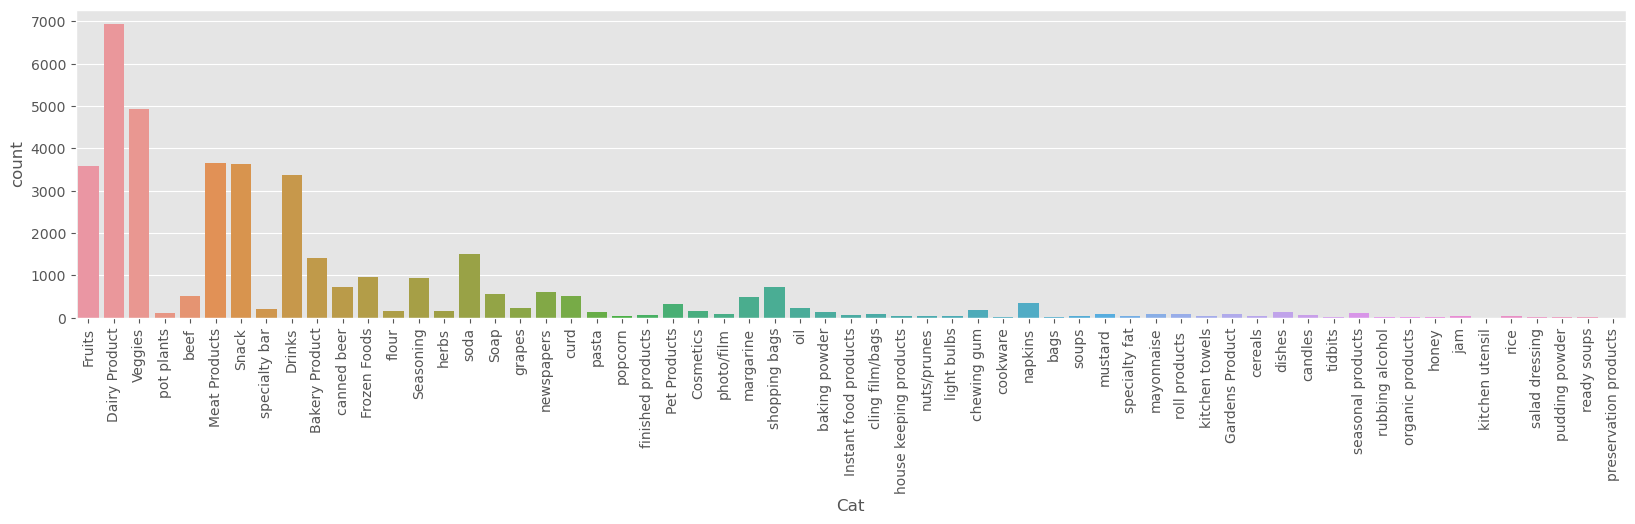

In [11]:
plt.figure(figsize =(20,4))
sns.countplot(data=df2,x=df2.Cat)
plt.xticks(rotation=90)
plt.show()

Its better :)

In [12]:
# change Date column type to Datetime

df.Date = pd.to_datetime(df.Date)
df.Date.dtype

dtype('<M8[ns]')

After changing date column type. we can look out for Cohorts

In [13]:
#Take the Retention Analysis

df['month'] = df['Date'].apply(lambda x: dt.date(x.year, x.month,1))

df['initial_month'] = df.groupby('Member_number')['month'].transform('min')

df.loc[df['month'] != df['initial_month']].head()

,Member_number,Date,itemDescription,month,initial_month
0,1808,2015-07-21,tropical fruit,2015-07-01,2014-11-01
1,2552,2015-05-01,whole milk,2015-05-01,2014-02-01
2,2300,2015-09-19,pip fruit,2015-09-01,2014-03-01
3,1187,2015-12-12,other vegetables,2015-12-01,2014-08-01
5,4941,2015-02-14,rolls/buns,2015-02-01,2014-02-01


In [14]:
def diff_month(x):

    d1 = x['month']

    d2 = x["initial_month"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1


df['cohort_idx'] = df.apply(lambda x: diff_month(x), axis=1)

df.head()

,Member_number,Date,itemDescription,month,initial_month,cohort_idx
0,1808,2015-07-21,tropical fruit,2015-07-01,2014-11-01,9
1,2552,2015-05-01,whole milk,2015-05-01,2014-02-01,16
2,2300,2015-09-19,pip fruit,2015-09-01,2014-03-01,19
3,1187,2015-12-12,other vegetables,2015-12-01,2014-08-01,17
4,3037,2015-01-02,whole milk,2015-01-01,2015-01-01,1


In [15]:
def get_cohort_matrix(data, var='Member_number', func=pd.Series.nunique):

    cd = data.groupby(['initial_month', 'cohort_idx'])[var].apply(func).reset_index()

    cc = cd.pivot_table(index = 'initial_month',

                        columns = 'cohort_idx',

                        values = var)

    cs = cc.iloc[:,0]

    retention = cc.divide(cs, axis = 0)

    retention = retention.round(3) * 100

    return cc, retention

In [16]:
cc, retention = get_cohort_matrix(df)

cc

cohort_idx,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
initial_month,,,,,,,,,,,,,,,,,,,,,
2014-01-01,605.0,98.0,87.0,87.0,108.0,102.0,103.0,74.0,74.0,102.0,...,81.0,86.0,82.0,90.0,78.0,84.0,67.0,93.0,84.0,73.0
2014-02-01,522.0,81.0,76.0,91.0,74.0,78.0,84.0,73.0,83.0,92.0,...,70.0,76.0,76.0,68.0,76.0,70.0,74.0,66.0,62.0,NaN
2014-03-01,440.0,62.0,79.0,64.0,70.0,68.0,58.0,88.0,69.0,55.0,...,52.0,59.0,59.0,75.0,63.0,57.0,68.0,54.0,NaN,NaN
2014-04-01,383.0,53.0,57.0,66.0,58.0,55.0,70.0,59.0,66.0,58.0,...,48.0,41.0,60.0,46.0,58.0,63.0,46.0,NaN,NaN,NaN
2014-05-01,319.0,39.0,49.0,57.0,57.0,53.0,42.0,56.0,40.0,30.0,...,41.0,54.0,42.0,31.0,45.0,46.0,NaN,NaN,NaN,NaN
2014-06-01,262.0,45.0,50.0,39.0,46.0,32.0,35.0,46.0,36.0,37.0,...,40.0,35.0,30.0,33.0,35.0,NaN,NaN,NaN,NaN,NaN
2014-07-01,225.0,28.0,27.0,26.0,34.0,36.0,39.0,28.0,28.0,34.0,...,20.0,29.0,32.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,202.0,26.0,32.0,23.0,29.0,32.0,17.0,31.0,30.0,27.0,...,24.0,27.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,147.0,22.0,23.0,24.0,25.0,26.0,24.0,20.0,24.0,24.0,...,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


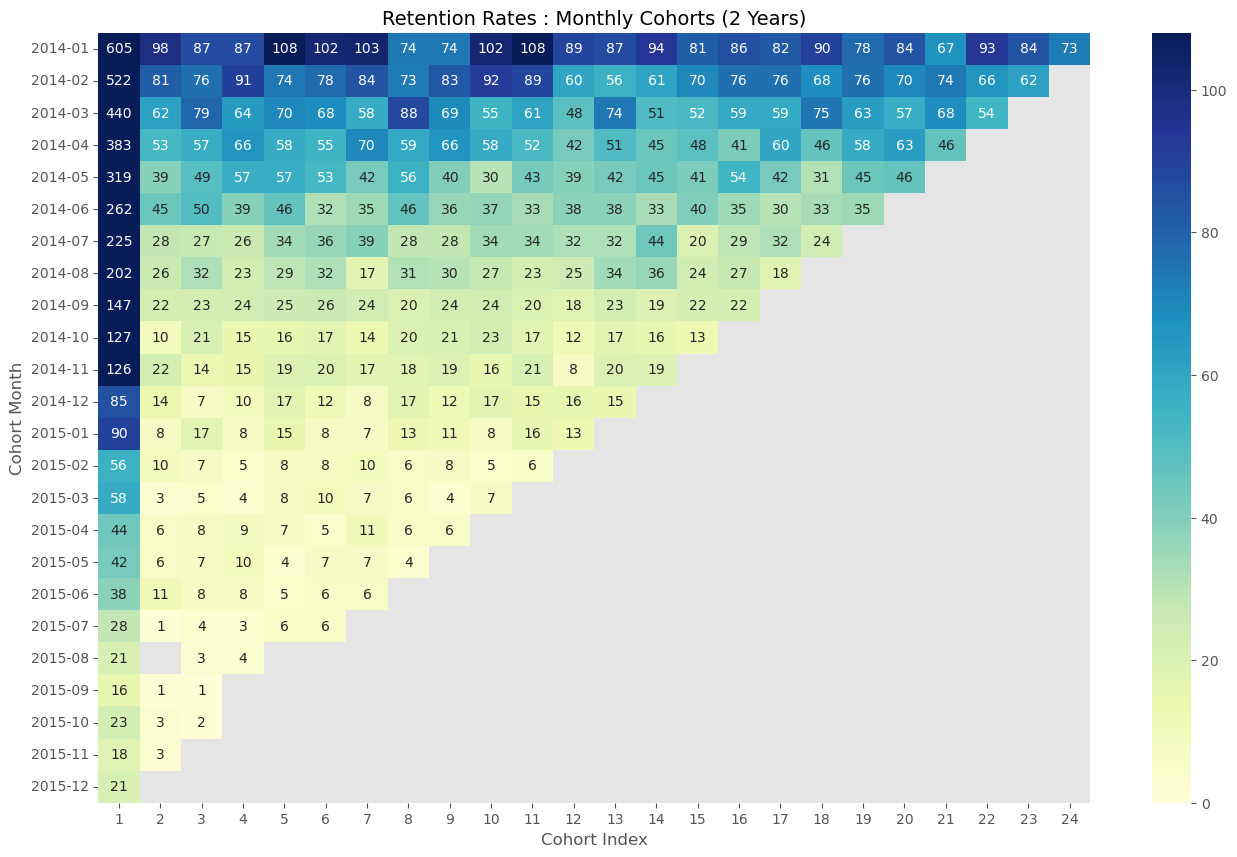

In [17]:
cc.index=cc.index.strftime('%Y-%m')

plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Retention Rates : Monthly Cohorts (2 Years)', fontsize = 14)
# Creating the heatmap
sns.heatmap(cc, annot = True,vmin = 0.0,vmax=108,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [18]:
cc[:-1][2] = cc[:-1][2].apply(lambda x: 0 if np.isnan(x) else x )

C:\Users\intel\AppData\Local\Temp\ipykernel_13720\1693723287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc[:-1][2] = cc[:-1][2].apply(lambda x: 0 if np.isnan(x) else x )


In [19]:
def count_LostCustomers(index):
    losts = list((cc[:-index][1]- cc[:-index][2]).values)
    losts.extend(list(cc[-index:][1].values))
    
    return losts
    # print(losts)

In [20]:
def churns(day):
    '''
        Initial Day / Day 1 = 0
        Day 2 = 1
    '''
    if day == 0:
        print("Initial Day")
        return
    
    avg = []
    lost_customers = count_LostCustomers(day)
    
    for i,idx in enumerate(cc.index):
        
        if i == len(cc.index)-day:
            break
        
        
        print(f'Churn Rate at {idx} Day {day+1} : ',end='')
        churns = ((lost_customers[i] / list(cc[i:i+1][1].values))*100)[0].round(2)
        avg.append(churns)
        print(churns) 
        
    print(f'\nAverage Churn Rate on Day-{day+1} : {(sum(avg)/len(avg)).round(2)}')

In [21]:
churns(1)

Churn Rate at 2014-01 Day 2 : 83.8
Churn Rate at 2014-02 Day 2 : 84.48
Churn Rate at 2014-03 Day 2 : 85.91
Churn Rate at 2014-04 Day 2 : 86.16
Churn Rate at 2014-05 Day 2 : 87.77
Churn Rate at 2014-06 Day 2 : 82.82
Churn Rate at 2014-07 Day 2 : 87.56
Churn Rate at 2014-08 Day 2 : 87.13
Churn Rate at 2014-09 Day 2 : 85.03
Churn Rate at 2014-10 Day 2 : 92.13
Churn Rate at 2014-11 Day 2 : 82.54
Churn Rate at 2014-12 Day 2 : 83.53
Churn Rate at 2015-01 Day 2 : 91.11
Churn Rate at 2015-02 Day 2 : 82.14
Churn Rate at 2015-03 Day 2 : 94.83
Churn Rate at 2015-04 Day 2 : 86.36
Churn Rate at 2015-05 Day 2 : 85.71
Churn Rate at 2015-06 Day 2 : 71.05
Churn Rate at 2015-07 Day 2 : 96.43
Churn Rate at 2015-08 Day 2 : 100.0
Churn Rate at 2015-09 Day 2 : 93.75
Churn Rate at 2015-10 Day 2 : 86.96
Churn Rate at 2015-11 Day 2 : 83.33

Average Churn Rate on Day-2 : 86.98
